In [49]:
import SimpleITK as sitk
import tensorflow.python
import numpy as np
import nibabel as nib
import scipy.misc
from tqdm import tqdm_notebook
import os
import cv2
from PIL import Image,ImageOps
import matplotlib.pyplot as plt # 描画用
import scipy.interpolate as interpolate
import pandas as pd

In [50]:
def load_vol(vol_path):
    vol_img = sitk.ReadImage(vol_path)
    vol_img = sitk.GetArrayFromImage(vol_img)
    return vol_img
    
def load_data(cid, seg_path, vol_path):
    raw_seg = nib.load(seg_path)
    raw_vol = nib.load(vol_path)

    affine = raw_vol.affine
    raw_vol = raw_vol.get_data()
    raw_seg = raw_seg.get_data()
    return raw_vol, raw_seg


def get_slice_idx(raw_seg):
    rnumber = len(raw_seg[0, 0, :])
    imagefragarray = []
    sliceIndex = []

    # 高さ方向の腎臓、腎臓がんの範囲特定
    for x in range(rnumber):

        imagefragarray = raw_seg[:, :, x]

        if np.where(imagefragarray != 0, True, False).any():
            sliceIndex.append(x)

    return sliceIndex

In [59]:
df=pd.read_csv('../log_df2.csv',index_col=0)

In [60]:
df.shape

(41605, 10)

In [67]:
df.iloc[0].path

'C:\\Users\\higuchi\\Desktop\\LAB\\201906_\\segmentation\\data\\label_sagittal2\\case_00000\\0\\label0.mha'

In [61]:
df.head()

,path,padding_size,roi_s0,roi_s1,raw_s0,raw_s1,area,degree,center0,center1
0,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,51,70,611,512,238.0,-78.690071,325.173065,283.134613
1,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,60,83,611,512,568.5,-87.614059,324.168976,283.444519
2,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,99,69,611,512,1124.0,-2.385944,322.694946,278.179382
3,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,74,108,611,512,1619.5,-87.273689,320.777161,277.179871
4,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,77,124,611,512,2096.0,-85.426079,320.386292,277.670929


In [72]:
d_num_df=df[df['path'].str.contains(rf'\\{d_num}\\')]


,path,padding_size,roi_s0,roi_s1,raw_s0,raw_s1,area,degree,center0,center1
0,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,51,70,611,512,238.0,-78.690071,325.173065,283.134613
1,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,60,83,611,512,568.5,-87.614059,324.168976,283.444519
2,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,99,69,611,512,1124.0,-2.385944,322.694946,278.179382
3,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,74,108,611,512,1619.5,-87.273689,320.777161,277.179871
4,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,77,124,611,512,2096.0,-85.426079,320.386292,277.670929
5,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,80,131,611,512,2564.0,-83.990990,319.883545,277.856140
6,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,83,138,611,512,3001.0,-81.869896,319.449982,277.349976
7,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,86,145,611,512,3477.0,-85.030258,320.069458,277.201721
8,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,88,150,611,512,3938.5,-81.469231,319.096619,276.689514
9,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,91,154,611,512,4345.0,-81.027374,318.941895,276.201355


In [76]:
from keras.models import load_model
day='0625'
for d_num in range(10):
    model = load_model(f'./Result/Trained_weights/{d_num}/{day}.h5')
    d_num_df=df[df['path'].str.contains(rf'\\{d_num}\\')]

    for index,row in d_num_df.iterrows():
        path=row.path
        path=path.replace('label_sagittal2','image_sagittal2')

        vol_img=load_vol(path)
        seg_pred=model.predict(vol_img, batch_size=1)

        roi_shape=(row.roi_s0,row.roi_s1)
        raw_shape=(row.raw_s0,row.raw_s1)
        center=(row.center0,row.center1)
        degree=row.degree
        PADDING_SIZE=row.padding_size

        raw_seg=revert_image(seg_pred, PADDING_SIZE, roi_shape, raw_shape, degree, center)
        save_path=path.replace('image_sagittal','pred_sagittal2')

        sitk.WriteImage(raw_seg, save_path, True)


In [70]:


# mini_df=df[df['path'].str.contains(f'case_00+{str(i).zfill(3)}')]
for row in d_num_mini_df:

,path,padding_size,roi_s0,roi_s1,raw_s0,raw_s1,area,degree,center0,center1
154,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,40,41,602,512,0.0,0.000000,284.500000,309.000000
155,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,42,47,602,512,10.0,-26.565050,285.300049,308.600037
156,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,53,64,602,512,171.5,-80.537674,282.459442,316.743225
157,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,71,61,602,512,477.0,-10.007980,281.785248,317.949677
158,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,92,68,602,512,884.0,-15.255118,280.542297,311.488495
159,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,101,70,602,512,1295.0,-4.763642,280.482758,311.293152
160,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,113,74,602,512,1744.5,-12.528809,281.176483,314.794098
161,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,122,78,602,512,2198.5,-10.619655,280.684906,315.652832
162,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,128,82,602,512,2717.5,-0.000000,278.000000,318.000000
163,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,133,86,602,512,3298.0,-0.000000,278.000000,318.500000


In [78]:
a=np.zeros(9)
b=np.zeros(9)

np.sum(a==b)

9

In [30]:
df.iloc[1].path

'C:\\Users\\higuchi\\Desktop\\LAB\\201906_\\segmentation\\data\\label_sagittal2\\case_00000\\0\\label1.mha'

In [43]:
i=10
path=df.iloc[0].path
roi_shape=(df.iloc[0].roi_s0,df.iloc[0].roi_s1)
raw_shape=(df.iloc[0].raw_s0,df.iloc[0].raw_s1)
center=(df.iloc[0].center0,df.iloc[0].center1)
degree=df.iloc[0].degree
PADDING_SIZE=df.iloc[0].padding_size
seg_img=sitk.ReadImage(path)
seg_img = sitk.GetArrayFromImage(seg_img)

In [18]:
df.head()

,path,padding_size,roi_s0,roi_s1,raw_s0,raw_s1,area,degree,center0,center1
0,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,51,70,611,512,238.0,-78.690071,325.173065,283.134613
1,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,60,83,611,512,568.5,-87.614059,324.168976,283.444519
2,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,99,69,611,512,1124.0,-2.385944,322.694946,278.179382
3,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,74,108,611,512,1619.5,-87.273689,320.777161,277.179871
4,C:\Users\higuchi\Desktop\LAB\201906_\segmentat...,20,77,124,611,512,2096.0,-85.426079,320.386292,277.670929


In [19]:
def csv2generator(df,cid):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-19-4df6b0cb1d16>, line 2)

In [24]:
#変換後画像->元画像の変換 square_imgは3dim numpy_array
def revert_image(square_img, PADDING_SIZE, roi_shape, raw_shape, degree, center):
    rows,cols =roi_shape

    tmp2 = cv2.resize(square_img, dsize=(cols, rows), interpolation=cv2.INTER_CUBIC)
    tmp3 = tmp2[PADDING_SIZE:-PADDING_SIZE + 2, PADDING_SIZE:-PADDING_SIZE + 1]

    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), -degree, 1)
    M[0, 2] += center[0]
    M[1, 2] += center[1]
    raw_slice = cv2.warpAffine(tmp3, M, (raw_shape[1], raw_shape[0]))

    return raw_slice

In [27]:
raw_img=revert_image(seg_img, PADDING_SIZE, roi_shape, raw_shape, degree, center)
plt.imshow(raw_img,cmap='gray',origin='lower')
plt.show()
plt.imshow(seg_img,cmap='gray',origin='lower')
plt.show()

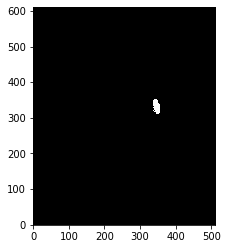

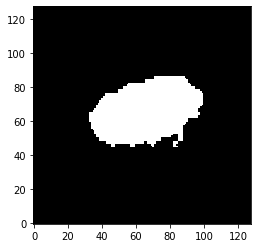

In [31]:
import SimpleITK as sitk
import tensorflow.python
import numpy as np
import nibabel as nib
import scipy.misc
from tqdm import tqdm_notebook, tqdm
import os
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt  # 描画用
import scipy.interpolate as interpolate
import pandas as pd


def rotate(image, angle, center):
    h, w = image.shape[:2]
    affine = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, affine, (w, h))


def load_data(cid, seg_path, vol_path):
    raw_seg = nib.load(seg_path)
    raw_vol = nib.load(vol_path)

    affine = raw_vol.affine
    raw_vol = raw_vol.get_data()
    raw_seg = raw_seg.get_data()
    return raw_vol, raw_seg


def get_slice_idx(raw_seg):
    rnumber = len(raw_seg[0, 0, :])
    imagefragarray = []
    sliceIndex = []

    # 高さ方向の腎臓、腎臓がんの範囲特定
    for x in range(rnumber):

        imagefragarray = raw_seg[:, :, x]

        if np.where(imagefragarray != 0, True, False).any():
            sliceIndex.append(x)

    return sliceIndex


def transform_img(slice_seg, slice_vol, IM_SIZE):
    contours, hierarchy = cv2.findContours(slice_seg, 1, 2)

    # 最大領域の取得
    max_id = np.argmax(np.array([cv2.contourArea(cnt) for cnt in contours]))
    max_countor = contours[max_id]

    # 面積
    area = cv2.contourArea(max_countor)
    rect = cv2.minAreaRect(max_countor)

    # 回転点,領域の大きさ,回転角
    center, size, degree = rect
    # 角度から4座標に変換
    box = cv2.boxPoints(rect)

    # 角度が0になった場合、関心領域はどこに写像されるか取得
    horizon_rect = (center, size, 0)
    horizon_box = cv2.boxPoints(horizon_rect)

    # (Left,Right,Top,Bottom:X,Y)
    LX = int(horizon_box[0, 0])
    RX = int(horizon_box[3, 0])
    TY = int(horizon_box[0, 1])
    UY = int(horizon_box[1, 1])

    if LX > RX:
        LX, RX = RX, LX

    if TY > UY:
        TY, UY = UY, TY

    PAD_TY = TY - PADDING_SIZE if (TY - PADDING_SIZE) > 0 else 0
    PAD_UY = UY + PADDING_SIZE

    PAD_LX = LX - PADDING_SIZE if(LX - PADDING_SIZE) > 0 else 0
    PAD_RX = RX + PADDING_SIZE

    # 画像全体を回転させる。
    rotate_vol_a = rotate(slice_vol, degree, center)
    rotate_seg_a = rotate(slice_seg, degree, center)

    clip_vol = rotate_vol_a[PAD_TY:PAD_UY, PAD_LX:PAD_RX]
    clip_seg = rotate_seg_a[PAD_TY:PAD_UY, PAD_LX:PAD_RX]
    box_shape = clip_seg.shape

    clip_vol = cv2.resize(clip_vol, dsize=(IM_SIZE, IM_SIZE), interpolation=cv2.INTER_LINEAR)
    clip_seg = cv2.resize(clip_seg, dsize=(IM_SIZE, IM_SIZE), interpolation=cv2.INTER_LINEAR)

    return clip_seg, clip_vol, box_shape, degree, center, area


def make_paths(cid, folder_num, slice_num):
    label_path = os.path.join(
        r"C:\Users\higuchi\Desktop\LAB\201906_\segmentation\data\label_sagittal2\case_00" + str(cid).zfill(3),
        str(folder_num))

    image_path = os.path.join(
        r"C:\Users\higuchi\Desktop\LAB\201906_\segmentation\data\image_sagittal2\case_00" + str(cid).zfill(3),
        str(folder_num))

    os.makedirs(label_path, exist_ok=True); os.makedirs(image_path, exist_ok=True)

    seg_path = os.path.join(label_path, "label{}.mha".format(slice_num))
    vol_path = os.path.join(image_path, "image{}.mha".format(slice_num))

    seg_jpg_path = os.path.join(label_path, "label{}.jpg".format(slice_num))
    vol_jpg_path = os.path.join(image_path, "image{}.jpg".format(slice_num))

    return seg_path, vol_path, seg_jpg_path, vol_jpg_path



# 周囲の余白の大きさ
PADDING_SIZE = 20
# 各スライスの学習データの画像サイズ
FIXED_SIZES = [128, 256, 256, 256, 128, 128, 256, 256, 256, 128]
ROOT_PATH = r"C:\Users\higuchi\Desktop\kits19\data\case_00"

log_df = pd.DataFrame(
columns=[
    'path',
    'padding_size',
    'roi_s0',
    'roi_s1',
    'raw_s0',
    'raw_s1',
    'area',
    'degree',
    'center0',
    'center1'])





In [46]:
sliceIndex

[138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366]

In [39]:
cid=0
seg_path = os.path.join(ROOT_PATH + str(cid).zfill(3), "segmentation.nii.gz")
vol_path = os.path.join(ROOT_PATH + str(cid).zfill(3), "imaging.nii.gz")

raw_vol, raw_seg = load_data(cid, seg_path, vol_path)
sliceIndex = get_slice_idx(raw_seg)
each_folder_num = int(len(sliceIndex) // 10)  # 特定されたスライスの枚数/10
folder_num = 0  # スライスを10等分するための定数

for i, x in enumerate(sliceIndex):
    if (i % each_folder_num == 0) and (i != 0):
        # 9番目は10で割った余りも含めてフォルダに入れる
        if folder_num != 9:
            folder_num += 1

    IM_SIZE = FIXED_SIZES[folder_num]

    slice_vol = raw_vol[:, :, x]
    slice_seg = raw_seg[:, :, x]
    slice_seg = slice_seg.astype(np.uint8)

    clip_seg, clip_vol, clip_seg_shape, degree, center, area = transform_img(slice_seg, slice_vol, IM_SIZE)
    seg_path, vol_path, seg_jpg_path, vol_jpg_path = make_paths(cid, folder_num, i)


    clip_seg_itk = sitk.GetImageFromArray(clip_seg)
    clip_vol_itk = sitk.GetImageFromArray(clip_vol)
    
    break

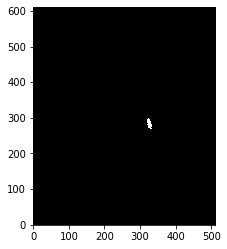

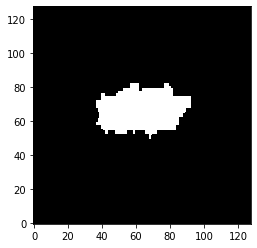

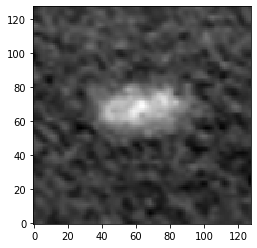

In [40]:
plt.imshow(slice_seg,cmap='gray',origin='lower')
plt.show()

plt.imshow(clip_seg,cmap='gray',origin='lower')
plt.show()

plt.imshow(clip_vol,cmap='gray',origin='lower')
plt.show()

In [42]:
print(len(clip_seg[clip_seg==1]),len(slice_seg[slice_seg==1]))


1229 273


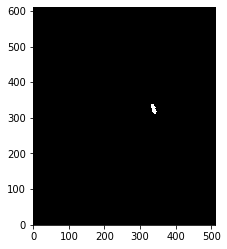

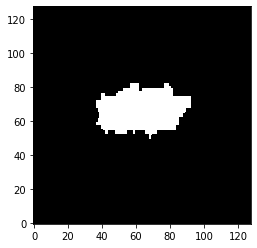

In [47]:
raw_img=revert_image(clip_seg, PADDING_SIZE, clip_seg_shape, raw_shape, degree, center)
plt.imshow(raw_img,cmap='gray',origin='lower')
plt.show()
plt.imshow(clip_seg,cmap='gray',origin='lower')
plt.show()

In [44]:
print(clip_seg_shape, degree, center, area)

(51, 70) -78.69007110595703 (325.1730651855469, 283.1346130371094) 238.0


In [48]:
print(len(raw_img[raw_img==1]),len(slice_seg[slice_seg==1]))

275 273
